# Plotting with Seaborn and Customization Techniques

## Utilizing seaborn for advanced plotting

In [1]:
import seaborn as sns
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
fb = pd.read_csv('book_code/ch_06/data/fb_stock_prices_2018.csv', index_col='date', parse_dates=True)
quakes = pd.read_csv('book_code/ch_06/data/earthquakes.csv')

### Categorical data

<AxesSubplot:xlabel='magType', ylabel='mag'>

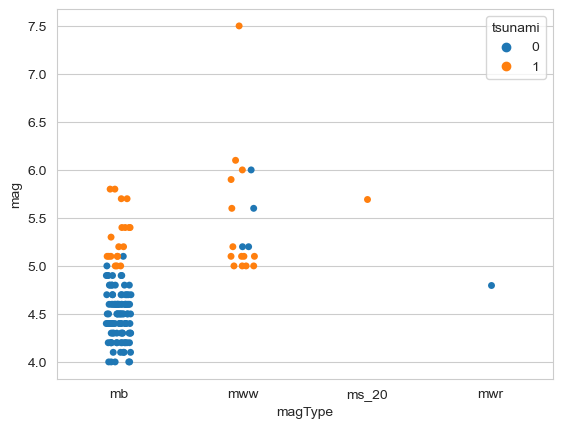

In [3]:
sns.stripplot(
    x='magType',
    y='mag',
    hue='tsunami',
    data=quakes.query('parsed_place == "Indonesia"')
)

<AxesSubplot:xlabel='magType', ylabel='mag'>

/Users/graftoncook/.conda/envs/workspace/lib/python3.10/site-packages/seaborn/categorical.py:3540: UserWarning: 10.2% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Users/graftoncook/.conda/envs/workspace/lib/python3.10/site-packages/seaborn/categorical.py:3540: UserWarning: 10.2% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


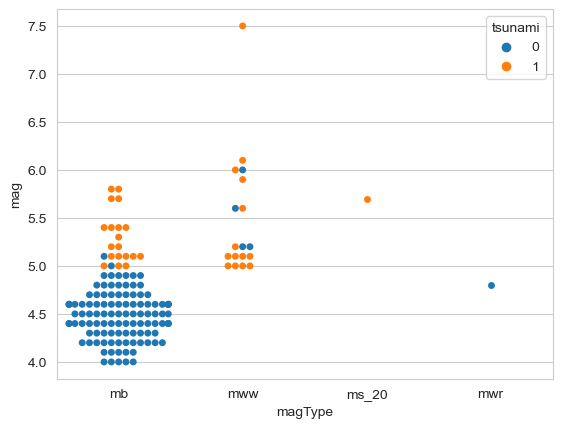

In [4]:
sns.swarmplot(
    x='magType',
    y='mag',
    hue='tsunami',
    data=quakes.query('parsed_place == "Indonesia"')
)

### Correlations and heatmaps

<AxesSubplot:>

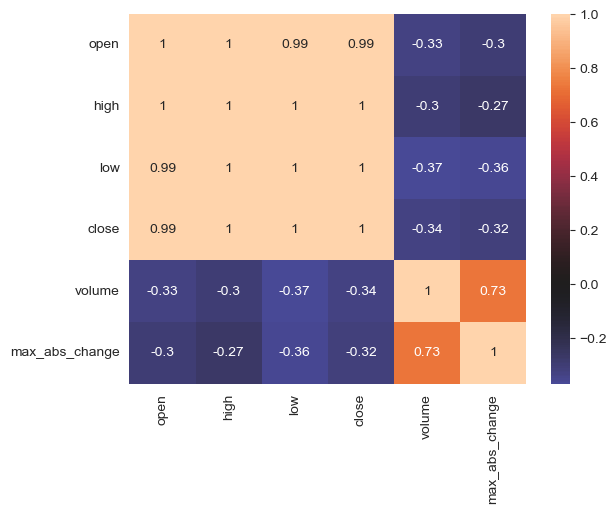

In [5]:
sns.heatmap(
    fb.sort_index().assign(
        volume=np.log(fb.volume),
        max_abs_change=fb.high-fb.low
    ).corr(),
    annot=True, center=0
)

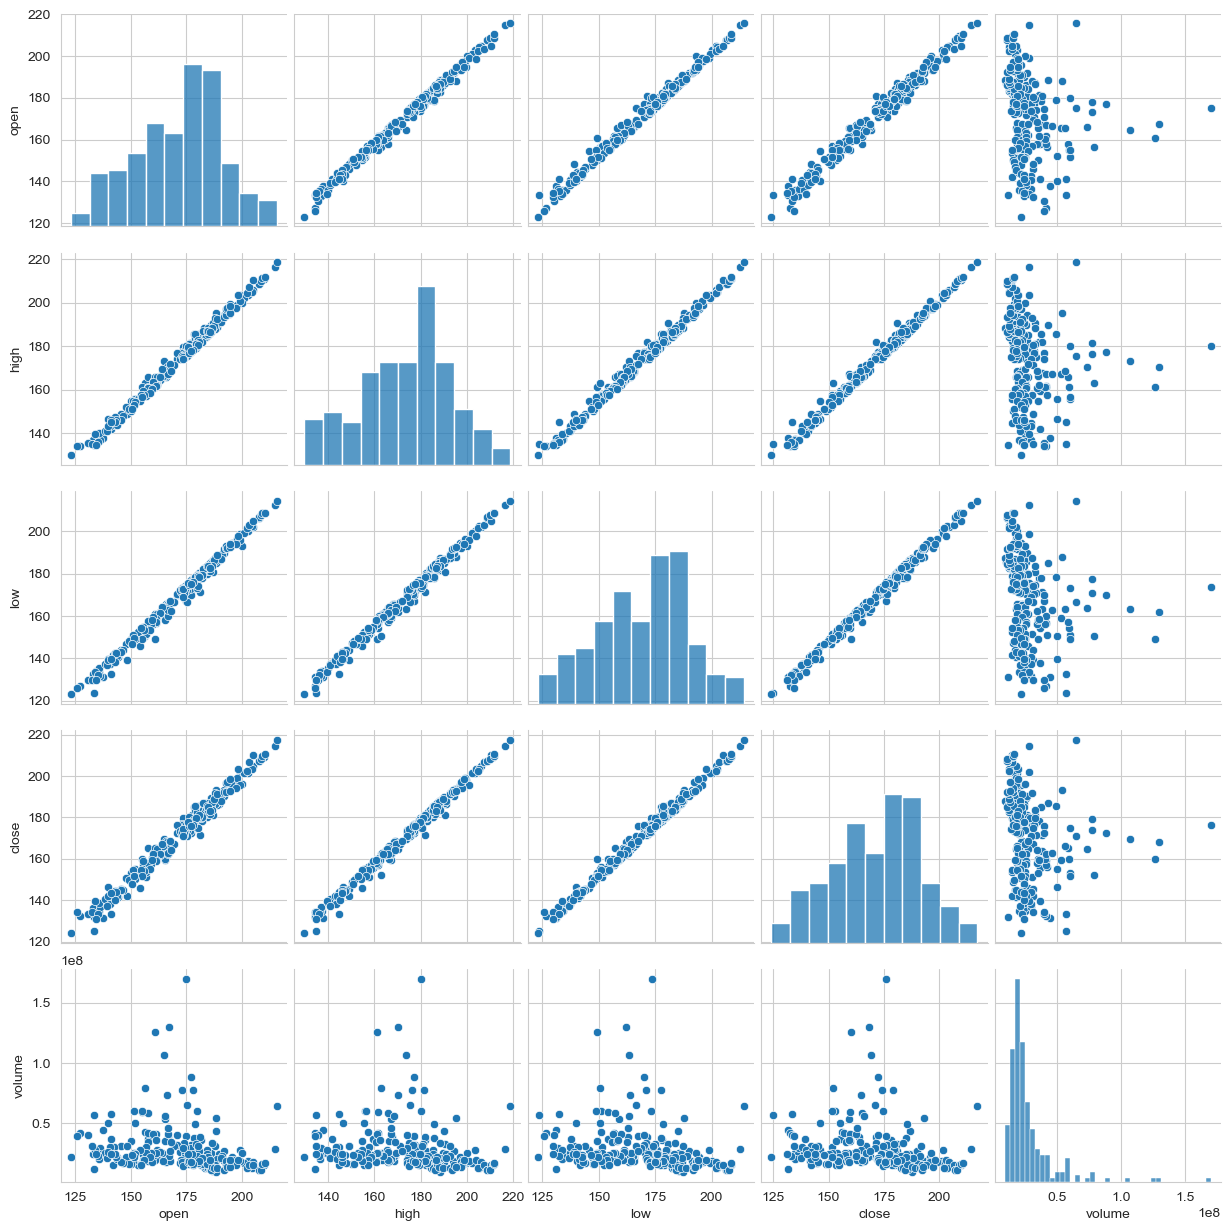

In [6]:
sns.pairplot(fb)

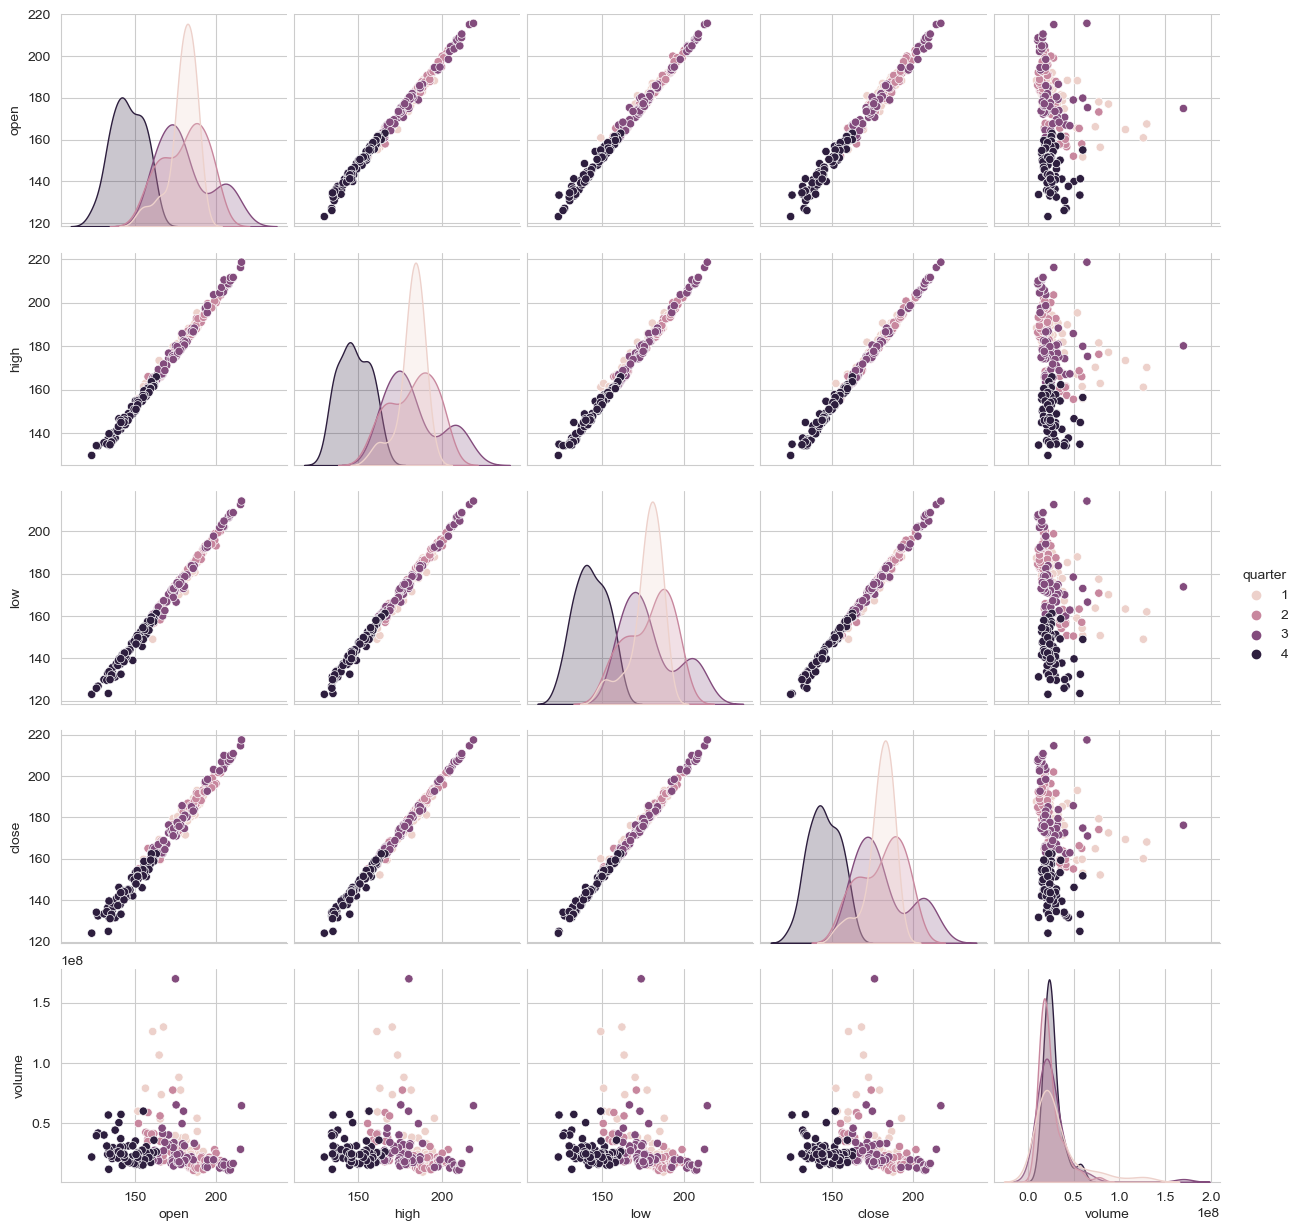

In [7]:
sns.pairplot(
    fb.assign(quarter=lambda x: x.index.quarter),
    diag_kind='kde',
    hue='quarter'
)

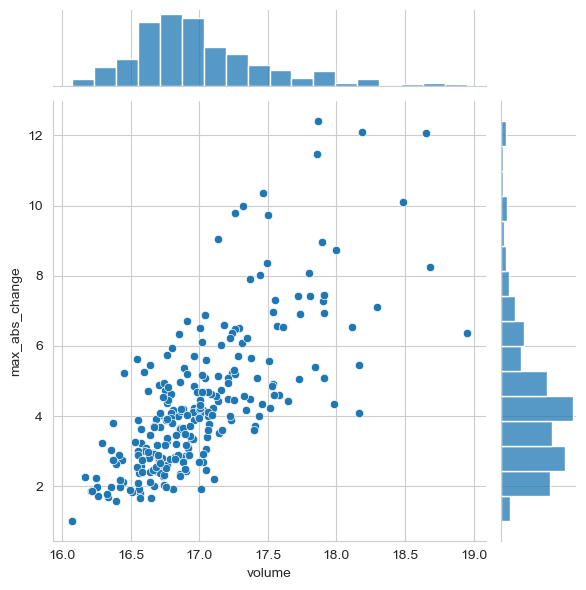

In [8]:
sns.jointplot(
    x='volume',
    y='max_abs_change',
    data=fb.assign(
        volume=np.log(fb.volume),
        max_abs_change=fb.high-fb.low
    )
)

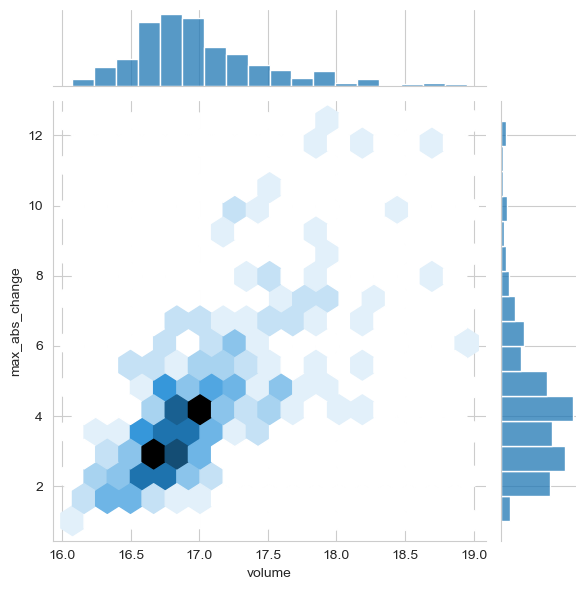

In [9]:
sns.jointplot(
    x='volume',
    y='max_abs_change',
    kind='hex',
    data=fb.assign(
        volume=np.log(fb.volume),
        max_abs_change=fb.high-fb.low
    )
)

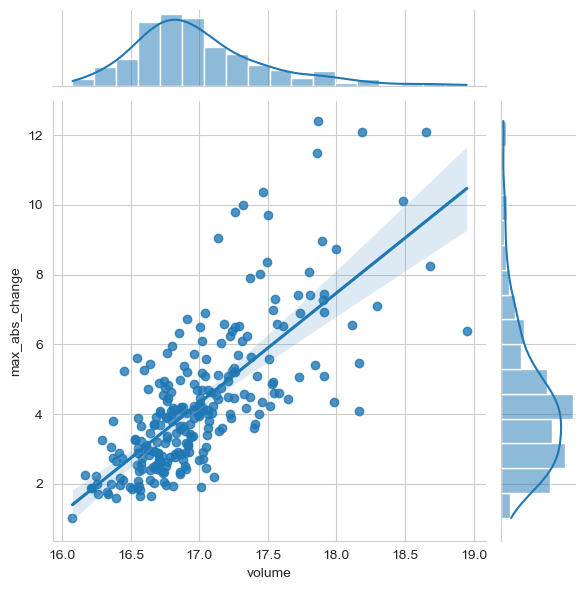

In [10]:
sns.jointplot(
    x='volume',
    y='max_abs_change',
    kind='reg',
    data=fb.assign(
        volume=np.log(fb.volume),
        max_abs_change=fb.high-fb.low
    )
)

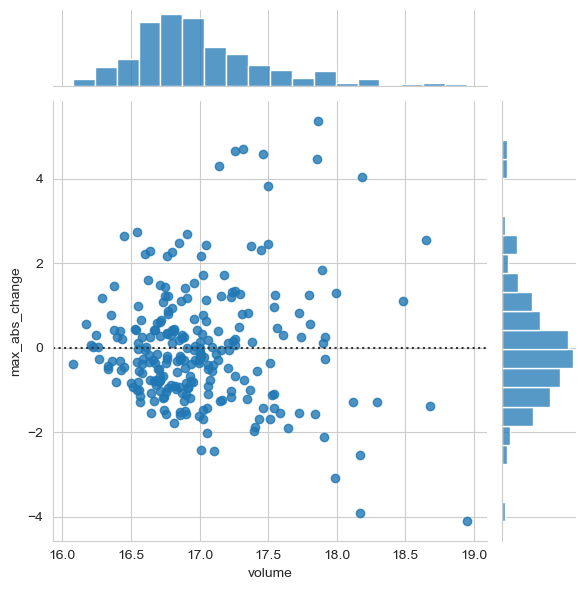

In [11]:
# Residuals plot
sns.jointplot(
    x='volume',
    y='max_abs_change',
    kind='resid',
    data=fb.assign(
        volume=np.log(fb.volume),
        max_abs_change=fb.high-fb.low
    )
)

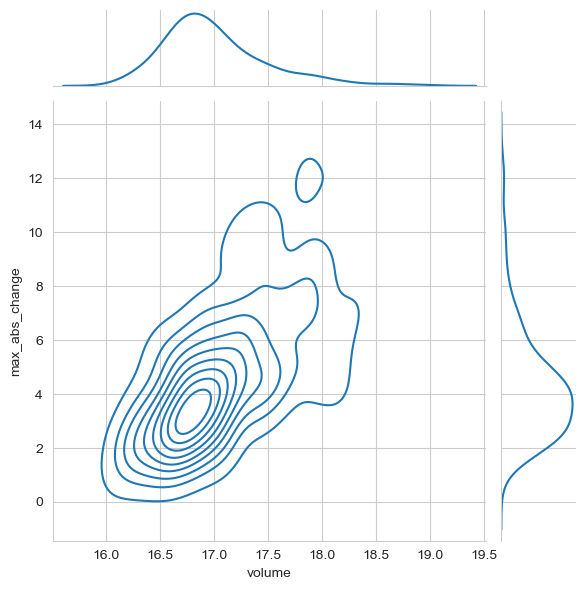

In [12]:
sns.jointplot(
    x='volume',
    y='max_abs_change',
    kind='kde',
    data=fb.assign(
        volume=np.log(fb.volume),
        max_abs_change=fb.high-fb.low
    )
)

### Regression plots

I skipped a good part of this one because she went pretty far into iterators, which I am still shaky on. I need to come back to this.

In [13]:
fb_reg_data = fb.assign(
    volume=np.log(fb.volume),
    max_abs_change=fb.high-fb.low
).iloc[:,-2:]

In [14]:
import itertools
iterator = itertools.repeat("I'm an iterator", 1)
for i in iterator:
    print(f'-->{i}')
print('This printed once because the iterator was exhausted')
for i in iterator:
    print(f'-->{i}')

-->I'm an iterator
This printed once because the iterator was exhausted


In [15]:
iterable = list(itertools.repeat("I'm an iterable", 1))
for i in iterable:
    print(f'-->{i}')
print('This prints again because it\'s an iterable:')
for i in iterable:
    print(f'-->{i}')

-->I'm an iterable
This prints again because it's an iterable:
-->I'm an iterable


In [18]:
def reg_resid_plots(data):
    """
    Using seaborn, plot the regression and residuals plots
    side-by-side for every permutation of 2 columns in the data.
    Parameters:
        - data: A pandas DataFrame
    Returns: A matplotlib Figure object.
    """
    num_cols = data.shape[1]
    permutation_count = num_cols * (num_cols - 1)
    fig, ax = plt.subplots(permutation_count, 2, figsize=(15, 8))
    for (x, y), axes, color in zip(
        itertools.permutations(data.columns, 2),
        ax,
        itertools.cycle(['royalblue', 'darkorange'])
    ):
        for subplot, func in zip (axes, (sns.regplot, sns.residplot)):
            func(x=x, y=y, data=data, ax=subplot, color=color)
    plt.close()
    return fig

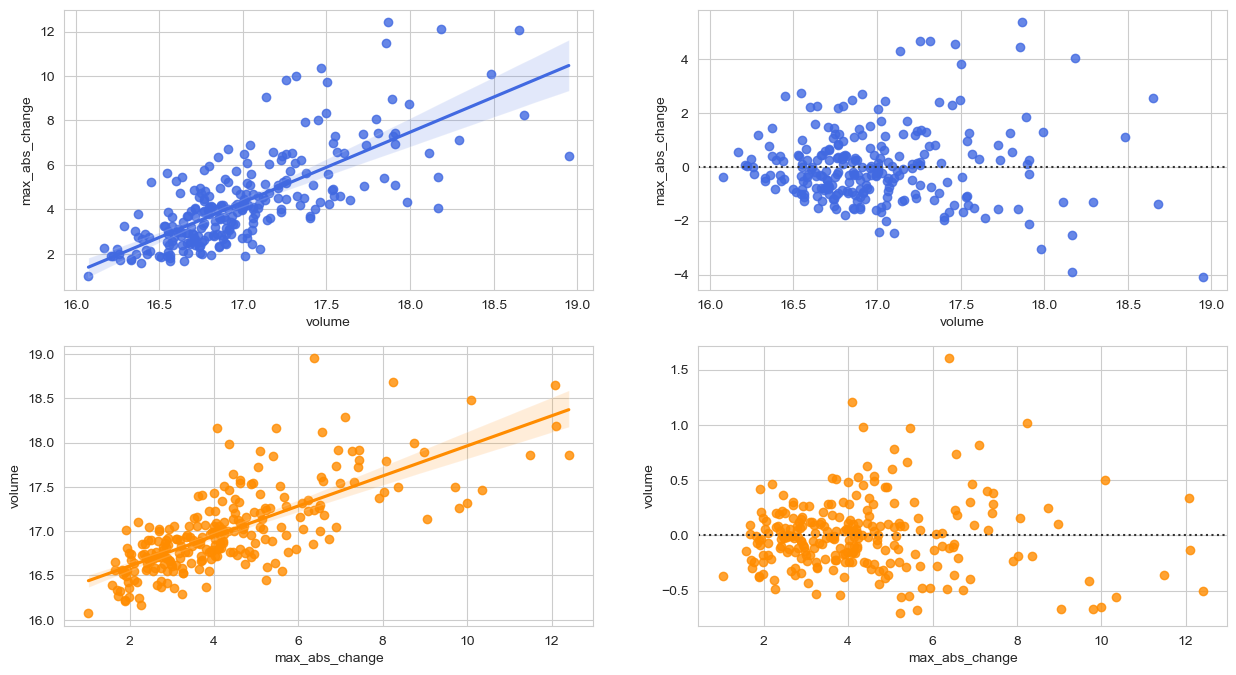

In [19]:
reg_resid_plots(fb_reg_data)

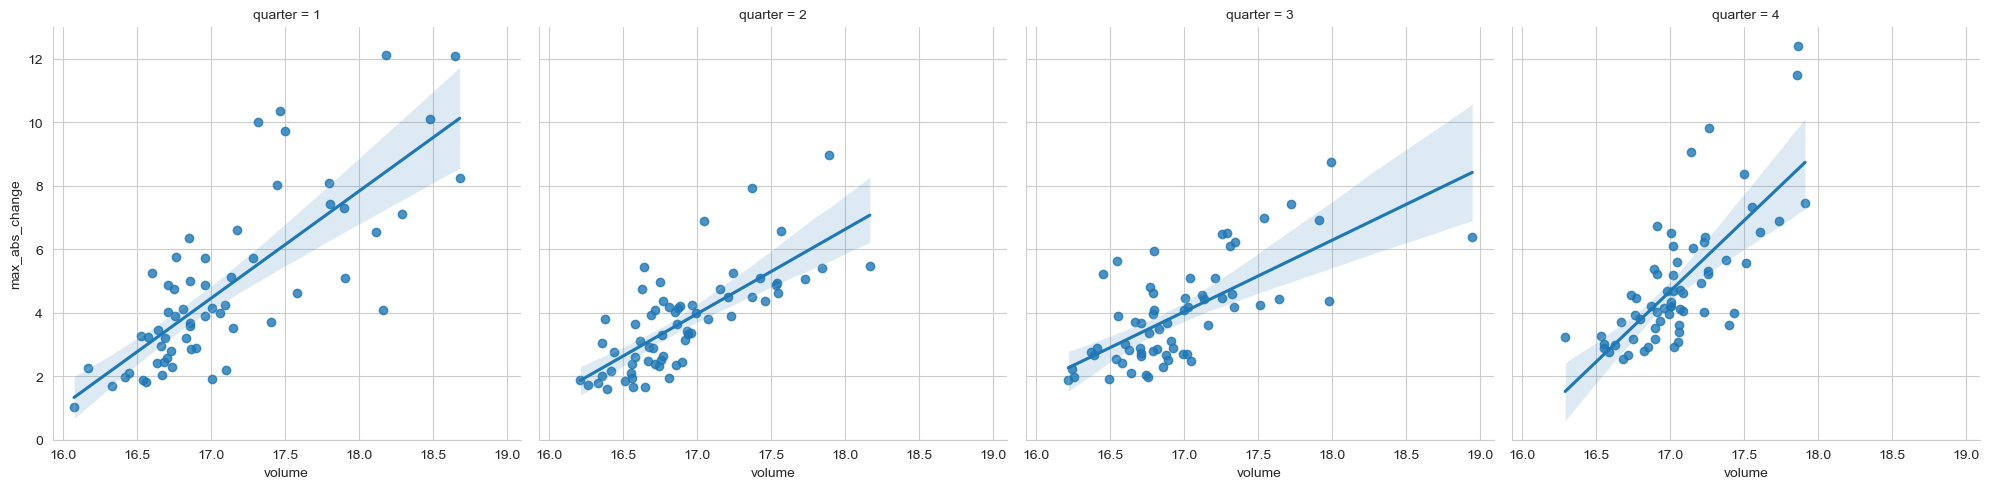

In [20]:
sns.lmplot(
    x='volume',
    y='max_abs_change',
    data=fb.assign(
        volume=np.log(fb.volume),
        max_abs_change=fb.high-fb.low,
        quarter=lambda x: x.index.quarter
    ),
    col='quarter'
)

### Distributions

Text(0.5, 0.98, 'Comparing earthquake magnitude by magType')

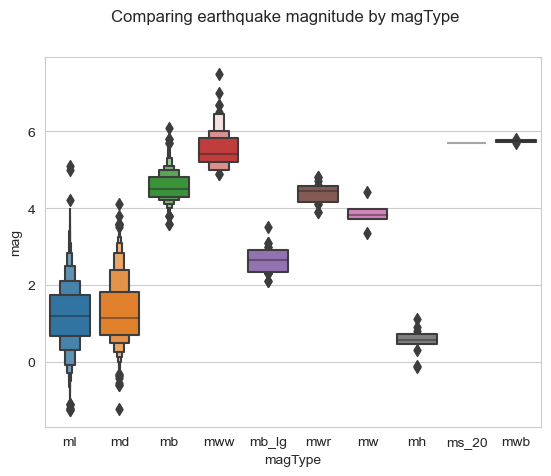

In [21]:
sns.boxenplot(
    x='magType', y='mag', data=quakes[['magType', 'mag']]
)
plt.suptitle('Comparing earthquake magnitude by magType')

Text(0.5, 0.98, 'Comparing earthquake magnitude by magType')

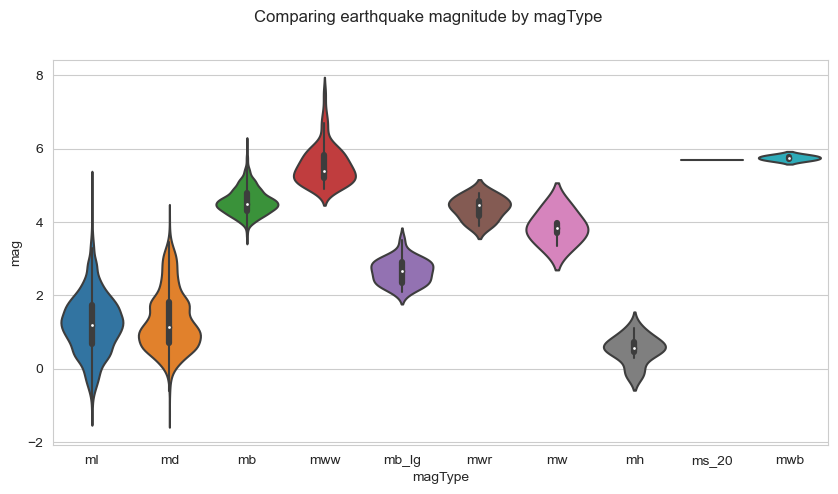

In [22]:
fig, axes = plt.subplots(figsize=(10,5))
sns.violinplot(
    x='magType', y='mag', data=quakes[['magType', 'mag']], ax=axes, scale='width')
# `scale='width'` creates equally-sized violins
plt.suptitle('Comparing earthquake magnitude by magType')

### Faceting

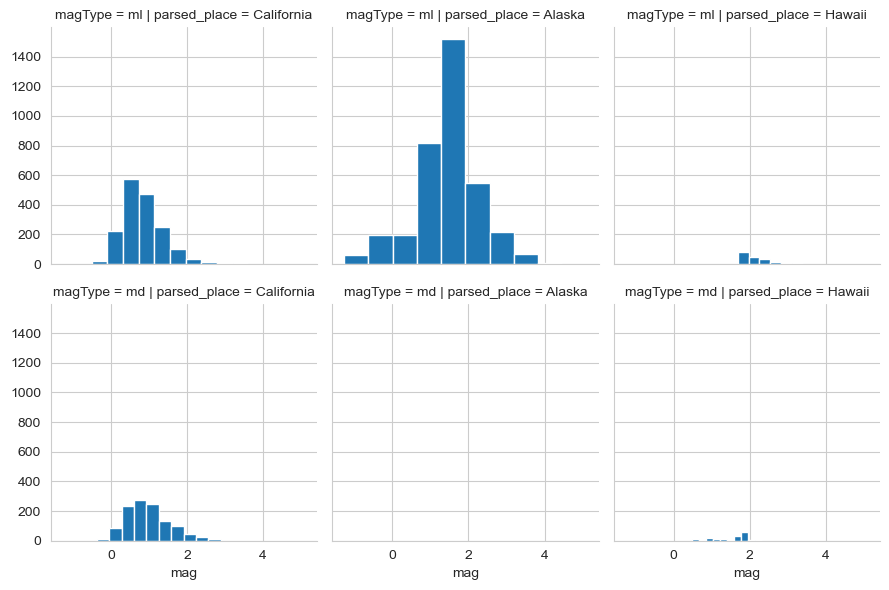

In [23]:
g = sns.FacetGrid(
    quakes[
        (quakes.parsed_place.isin([
            'California', 'Alaska', 'Hawaii'
        ]))
        & (quakes.magType.isin(['ml', 'md']))
    ],
    row='magType',
    col='parsed_place'
)
g = g.map(plt.hist, 'mag')

## Formatting

### Titles and Labels

### Legends

### Formatting axes

## Customizing visualizations

### Adding reference lines

### Shading regions

### Annotations

### Colors